# Statical Analysis

## Data Wrangling

Importing the required libraries for DW and EDA:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
%matplotlib inline 
sns.set(color_codes=True)

Loading the data into the data frame:

In [61]:
df = pd.read_csv('../data/surveys.csv')
df['id'] = df.index.values
df.head()

,overall_satisfaction,room_comfort_satisfaction,room_cleanness_satisfaction,nationality,reception_satisfaction,breakfast_satisfaction,regime,segment,entertainment_satisfaction,id
0,5.298,5.0,5.0,DE,4.0,4.0,all inclusive,NaN,4.0,0
1,2.989,3.0,3.0,ES,3.0,4.0,all inclusive,friends,4.0,1
2,1.910,5.0,5.0,ES,4.0,5.0,all inclusive,NaN,5.0,2
3,5.964,4.0,4.0,UK,4.0,5.0,all inclusive,family,NaN,3
4,2.122,5.0,NaN,ES,3.0,5.0,all inclusive,friends,3.0,4


Checking the number of rows and columns

In [62]:
df.shape

(1000, 10)

Checking the types of data:

In [63]:
df.dtypes

overall_satisfaction           float64
room_comfort_satisfaction      float64
room_cleanness_satisfaction    float64
nationality                     object
reception_satisfaction         float64
breakfast_satisfaction         float64
regime                          object
segment                         object
entertainment_satisfaction     float64
id                               int64
dtype: object

Checking main stadistics:

In [64]:
df.describe()

,overall_satisfaction,room_comfort_satisfaction,room_cleanness_satisfaction,reception_satisfaction,breakfast_satisfaction,entertainment_satisfaction,id
count,1000.000000,990.000000,949.00000,992.000000,987.000000,711.000000,1000.000000
mean,3.560109,3.904040,3.91254,3.535282,4.959473,3.855134,499.500000
std,1.537186,1.159601,1.16096,0.781190,0.197291,1.227662,288.819436
min,-1.002000,1.000000,1.00000,1.000000,4.000000,1.000000,0.000000
25%,2.464000,3.000000,3.00000,3.000000,5.000000,3.000000,249.750000
50%,3.184000,4.000000,4.00000,4.000000,5.000000,4.000000,499.500000
75%,4.964000,5.000000,5.00000,4.000000,5.000000,5.000000,749.250000
max,6.710000,5.000000,5.00000,5.000000,5.000000,5.000000,999.000000


Checking the porcentaje of null values per column:

In [65]:
df.isnull().sum()/df.shape[0]*100

overall_satisfaction            0.0
room_comfort_satisfaction       1.0
room_cleanness_satisfaction     5.1
nationality                     0.0
reception_satisfaction          0.8
breakfast_satisfaction          1.3
regime                         19.7
segment                        30.4
entertainment_satisfaction     28.9
id                              0.0
dtype: float64

Replace NaN (All numeric and chategoric): I use mode because surevey values are cathegorical 

In [66]:
cols = ["room_comfort_satisfaction", "room_cleanness_satisfaction", "reception_satisfaction", "breakfast_satisfaction", "entertainment_satisfaction" ]
df[cols]=df[cols].fillna(df.mode().iloc[0])

In [8]:
df.isnull().sum()/df.shape[0]*100

overall_satisfaction            0.0
room_comfort_satisfaction       0.0
room_cleanness_satisfaction     0.0
nationality                     0.0
reception_satisfaction          0.0
breakfast_satisfaction          0.0
regime                         19.7
segment                        30.4
entertainment_satisfaction      0.0
id                              0.0
dtype: float64

In [67]:
print(df['regime'].unique())
print(df['segment'].unique())

['all inclusive' nan]
[nan 'friends' 'family' 'business' 'couple']


I've deduced that the regime is only "all incluse". We should contrast this information with the business manager:

In [68]:
df['regime'] = 'all inclusive'

In [69]:
df.isnull().sum()/df.shape[0]*100

overall_satisfaction            0.0
room_comfort_satisfaction       0.0
room_cleanness_satisfaction     0.0
nationality                     0.0
reception_satisfaction          0.0
breakfast_satisfaction          0.0
regime                          0.0
segment                        30.4
entertainment_satisfaction      0.0
id                              0.0
dtype: float64

I have used K Nearest Neighbors to replace the "segment" nulls:

In [70]:
df_ = df.dropna()
X = df_[["room_comfort_satisfaction", "room_cleanness_satisfaction", "reception_satisfaction", "breakfast_satisfaction", "entertainment_satisfaction" ]]
X.head()

,room_comfort_satisfaction,room_cleanness_satisfaction,reception_satisfaction,breakfast_satisfaction,entertainment_satisfaction
1,3.0,3.0,3.0,4.0,4.0
3,4.0,4.0,4.0,5.0,5.0
4,5.0,5.0,3.0,5.0,3.0
5,5.0,5.0,4.0,5.0,5.0
6,5.0,5.0,4.0,5.0,5.0


In [71]:
y = df_['segment']
print(y[:10])

1      friends
3       family
4      friends
5     business
6       family
7      friends
8       family
9       family
10    business
11     friends
Name: segment, dtype: object


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [74]:
random.seed(666)

In [79]:
k_range = range(1,25)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

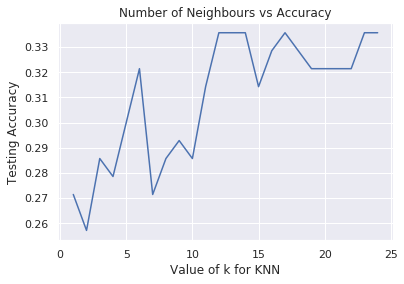

In [80]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Number of Neighbours vs Accuracy')
plt.show()

In [81]:
scores

{1: 0.2714285714285714,
 2: 0.2571428571428571,
 3: 0.2857142857142857,
 4: 0.2785714285714286,
 5: 0.3,
 6: 0.32142857142857145,
 7: 0.2714285714285714,
 8: 0.2857142857142857,
 9: 0.29285714285714287,
 10: 0.2857142857142857,
 11: 0.3142857142857143,
 12: 0.3357142857142857,
 13: 0.3357142857142857,
 14: 0.3357142857142857,
 15: 0.3142857142857143,
 16: 0.32857142857142857,
 17: 0.3357142857142857,
 18: 0.32857142857142857,
 19: 0.32142857142857145,
 20: 0.32142857142857145,
 21: 0.32142857142857145,
 22: 0.32142857142857145,
 23: 0.3357142857142857,
 24: 0.3357142857142857}

In [82]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [83]:
X_nan = df[df['segment'].isna()][["room_comfort_satisfaction", "room_cleanness_satisfaction", "reception_satisfaction", "breakfast_satisfaction", "entertainment_satisfaction" ]]
X_nan.head()

,room_comfort_satisfaction,room_cleanness_satisfaction,reception_satisfaction,breakfast_satisfaction,entertainment_satisfaction
0,5.0,5.0,4.0,4.0,4.0
2,5.0,5.0,4.0,5.0,5.0
13,5.0,5.0,4.0,5.0,5.0
16,4.0,4.0,4.0,5.0,5.0
19,3.0,3.0,3.0,4.0,5.0


In [84]:
X_nan['kmean-segment']= knn.predict(X_nan)
print(X_nan['kmean-segment'])

0        family
2        couple
13       couple
16       family
19       family
         ...   
968      family
973    business
976    business
981      family
999      couple
Name: kmean-segment, Length: 304, dtype: object


In these case the Accuracy is not very well (lower than 40%). For these reason, I've decided to eliminate null values. In real live, I would try another models to improve the accuracy and optimize hiperparameters:

In [85]:
data = df.dropna()

In [86]:
data.head()

,overall_satisfaction,room_comfort_satisfaction,room_cleanness_satisfaction,nationality,reception_satisfaction,breakfast_satisfaction,regime,segment,entertainment_satisfaction,id
1,2.989,3.0,3.0,ES,3.0,4.0,all inclusive,friends,4.0,1
3,5.964,4.0,4.0,UK,4.0,5.0,all inclusive,family,5.0,3
4,2.122,5.0,5.0,ES,3.0,5.0,all inclusive,friends,3.0,4
5,5.410,5.0,5.0,UK,4.0,5.0,all inclusive,business,5.0,5
6,5.410,5.0,5.0,DE,4.0,5.0,all inclusive,family,5.0,6


## Exploratory Data Analysis

### Histogram Data

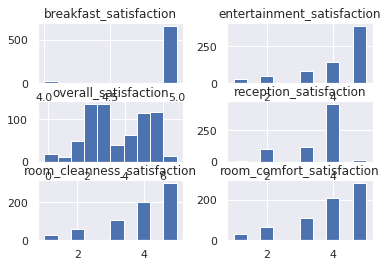

In [94]:
data.drop(['nationality', 'regime', 'segment', 'id'], axis=1).hist()
plt.show()

### Satisfaction Mean per Type

In [117]:
satisfaction_mean = df.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_type', 0:'mean'})
satisfaction_mean

,satisfaction_type,mean
0,overall_satisfaction,3.560109
1,room_comfort_satisfaction,3.915000
2,room_cleanness_satisfaction,3.968000
3,reception_satisfaction,3.539000
4,breakfast_satisfaction,4.960000
5,entertainment_satisfaction,4.186000


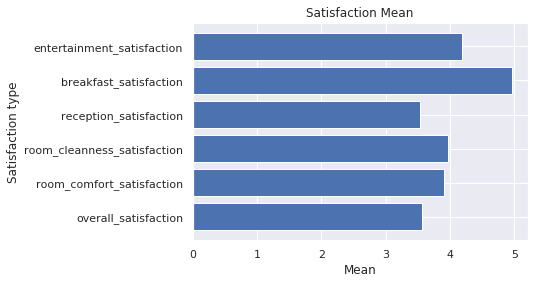

In [114]:
plt.title('Satisfaction Mean')
plt.xlabel('Mean')
plt.ylabel('Satisfaction type')
plt.barh(satisfaction_mean['satisfaction_type'],satisfaction_mean['mean'])
plt.show()

### Satisfaction type distribution

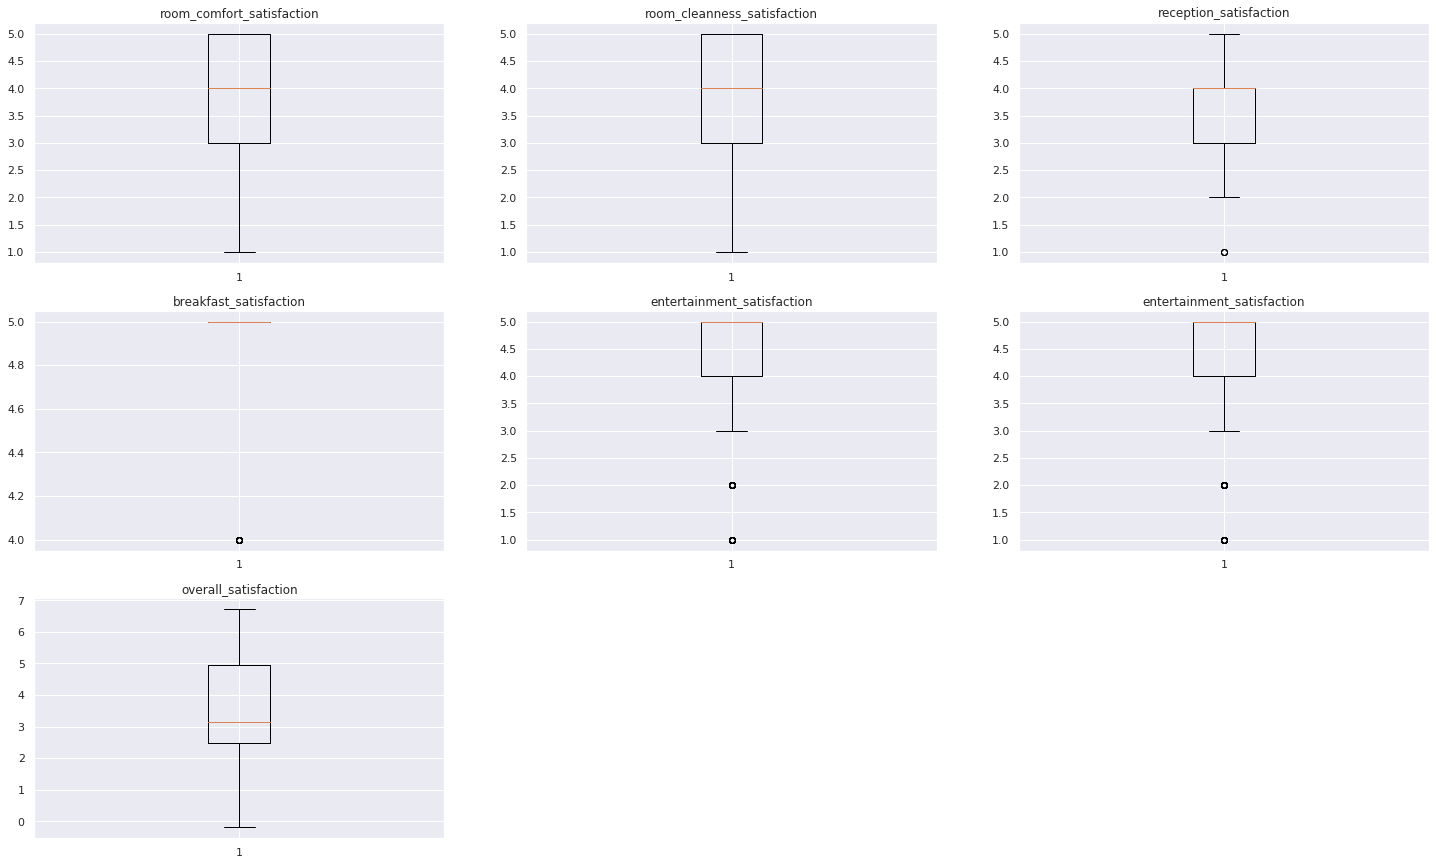

In [134]:
plt.figure(figsize=(25,15))
plt.subplot(3, 3, 1)
plt.boxplot(data['room_comfort_satisfaction'])
plt.title('room_comfort_satisfaction')


plt.subplot(3, 3, 2)
plt.boxplot(data['room_cleanness_satisfaction'])
plt.title('room_cleanness_satisfaction')


plt.subplot(3, 3, 3)
plt.boxplot(data['reception_satisfaction'])
plt.title('reception_satisfaction')

plt.subplot(3, 3, 4)
plt.boxplot(data['breakfast_satisfaction'])
plt.title('breakfast_satisfaction')

plt.subplot(3, 3, 5)
plt.boxplot(data['entertainment_satisfaction'])
plt.title('entertainment_satisfaction')

plt.subplot(3, 3, 6)
plt.boxplot(data['entertainment_satisfaction'])
plt.title('entertainment_satisfaction')

plt.subplot(3, 3, 7)
plt.boxplot(data['overall_satisfaction'])
plt.title('overall_satisfaction')

plt.show()

### Number of surveys per nationality

In [179]:
number_nationality = data[['nationality', 'id']].groupby('nationality').id.count().reset_index().sort_values('id', ascending=False)
number_nationality['percentage'] = (number_nationality['id']/number_nationality['id'].sum())*100
number_nationality.head()

,nationality,id,percentage
1,ES,339,48.706897
3,UK,208,29.885057
0,DE,72,10.344828
4,US,44,6.321839
2,FR,33,4.741379


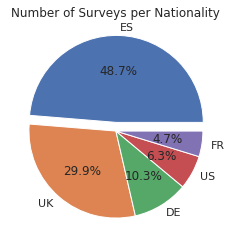

In [188]:
explode = (0.1, 0, 0, 0, 0) 
plt.pie(number_nationality['percentage'], explode=explode, labels=number_nationality['nationality'], autopct='%1.1f%%')
plt.title('Number of Surveys per Nationality')

plt.show()

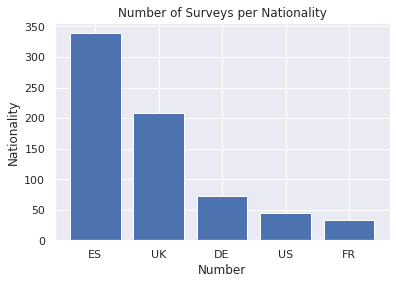

In [115]:
plt.title('Number of Surveys per Nationality')
plt.xlabel('Number')
plt.ylabel('Nationality')
plt.bar(number_nationality['nationality'], number_nationality['id'])
plt.show()

### Overall Satisfaction per Nationality

In [176]:
overall_satisfaction_nationality = data[['nationality', 'overall_satisfaction']].groupby('nationality').overall_satisfaction.mean().reset_index().sort_values('overall_satisfaction', ascending=False)
overall_satisfaction_nationality.head()

,nationality,overall_satisfaction
2,FR,5.219848
0,DE,4.860083
3,UK,4.677385
4,US,4.614977
1,ES,2.336183


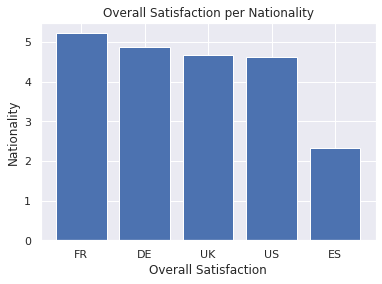

In [116]:
plt.title('Overall Satisfaction per Nationality')
plt.xlabel('Overall Satisfaction')
plt.ylabel('Nationality')
plt.bar(overall_satisfaction_nationality['nationality'], overall_satisfaction_nationality['overall_satisfaction'])
plt.show()

### Spain Satisfaction

In [143]:
satisfaction_es = df[df['nationality']=='ES']
satisfaction_es_mean = satisfaction_es.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_es', 0:'mean'})
satisfaction_es_mean

,satisfaction_es,mean
0,overall_satisfaction,2.336930
1,room_comfort_satisfaction,3.829569
2,room_cleanness_satisfaction,3.870637
3,reception_satisfaction,3.498973
4,breakfast_satisfaction,4.958932
5,entertainment_satisfaction,4.232033


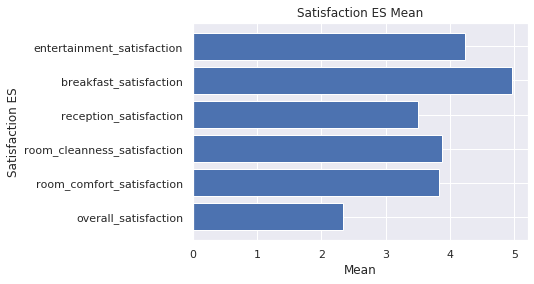

In [144]:
plt.title('Satisfaction ES Mean')
plt.xlabel('Mean')
plt.ylabel('Satisfaction ES')
plt.barh(satisfaction_es_mean['satisfaction_es'],satisfaction_spain_mean['mean'])
plt.show()

### UK Satisfaction

In [162]:
satisfaction_uk = df[df['nationality']=='UK']
satisfaction_uk_mean = satisfaction_uk.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_uk', 0:'mean'})
satisfaction_uk_mean

,satisfaction_uk,mean
0,overall_satisfaction,4.646861
1,room_comfort_satisfaction,3.986755
2,room_cleanness_satisfaction,4.049669
3,reception_satisfaction,3.562914
4,breakfast_satisfaction,4.976821
5,entertainment_satisfaction,4.192053


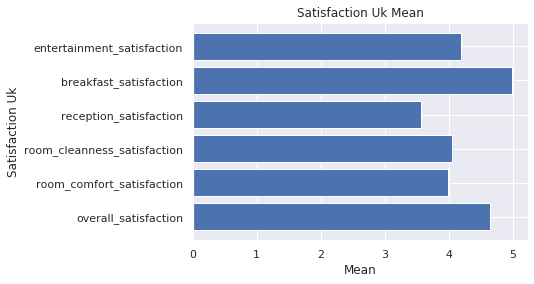

In [163]:
plt.title('Satisfaction Uk Mean')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Uk')
plt.barh(satisfaction_uk_mean['satisfaction_uk'], satisfaction_uk_mean['mean'])
plt.show()

### DE Satisfaction

In [145]:
satisfaction_de = df[df['nationality']=='DE']
satisfaction_de_mean = satisfaction_de.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_de', 0:'mean'})
satisfaction_de_mean

,satisfaction_de,mean
0,overall_satisfaction,4.831981
1,room_comfort_satisfaction,4.106796
2,room_cleanness_satisfaction,4.106796
3,reception_satisfaction,3.640777
4,breakfast_satisfaction,4.951456
5,entertainment_satisfaction,4.058252


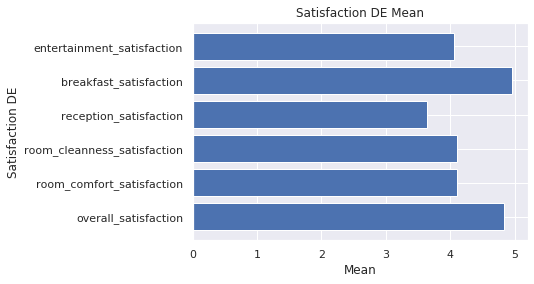

In [146]:
plt.title('Satisfaction DE Mean')
plt.xlabel('Mean')
plt.ylabel('Satisfaction DE')
plt.barh(satisfaction_de_mean['satisfaction_de'], satisfaction_de_mean['mean'])
plt.show()

### US Satisfaction

In [148]:
satisfaction_us = df[df['nationality']=='US']
satisfaction_us_mean = satisfaction_us.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_us', 0:'mean'})
satisfaction_us_mean

,satisfaction_us,mean
0,overall_satisfaction,4.619421
1,room_comfort_satisfaction,3.912281
2,room_cleanness_satisfaction,4.087719
3,reception_satisfaction,3.614035
4,breakfast_satisfaction,4.929825
5,entertainment_satisfaction,4.122807


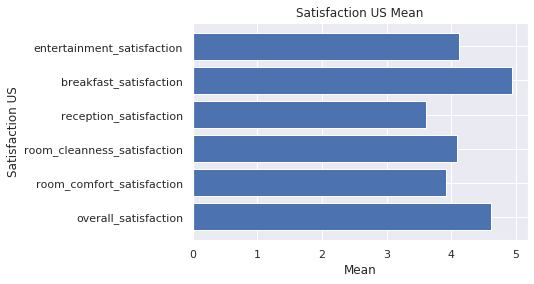

In [149]:
plt.title('Satisfaction US Mean')
plt.xlabel('Mean')
plt.ylabel('Satisfaction US')
plt.barh(satisfaction_us_mean['satisfaction_us'], satisfaction_us_mean['mean'])
plt.show()

### FR Satisfaction

In [151]:
satisfaction_fr = df[df['nationality']=='FR']
satisfaction_fr_mean = satisfaction_fr.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_fr', 0:'mean'})
satisfaction_fr_mean

,satisfaction_fr,mean
0,overall_satisfaction,5.052373
1,room_comfort_satisfaction,3.921569
2,room_cleanness_satisfaction,4.000000
3,reception_satisfaction,3.490196
4,breakfast_satisfaction,4.921569
5,entertainment_satisfaction,4.039216


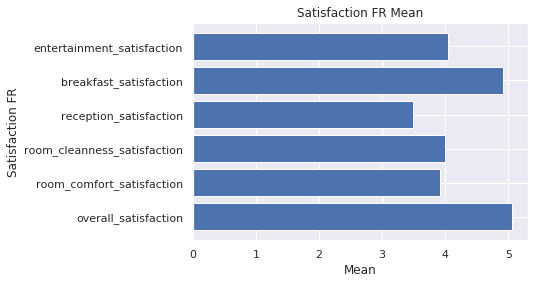

In [152]:
plt.title('Satisfaction FR Mean')
plt.xlabel('Mean')
plt.ylabel('Satisfaction FR')
plt.barh(satisfaction_fr_mean['satisfaction_fr'], satisfaction_fr_mean['mean'])
plt.show()

### Nationality Summary

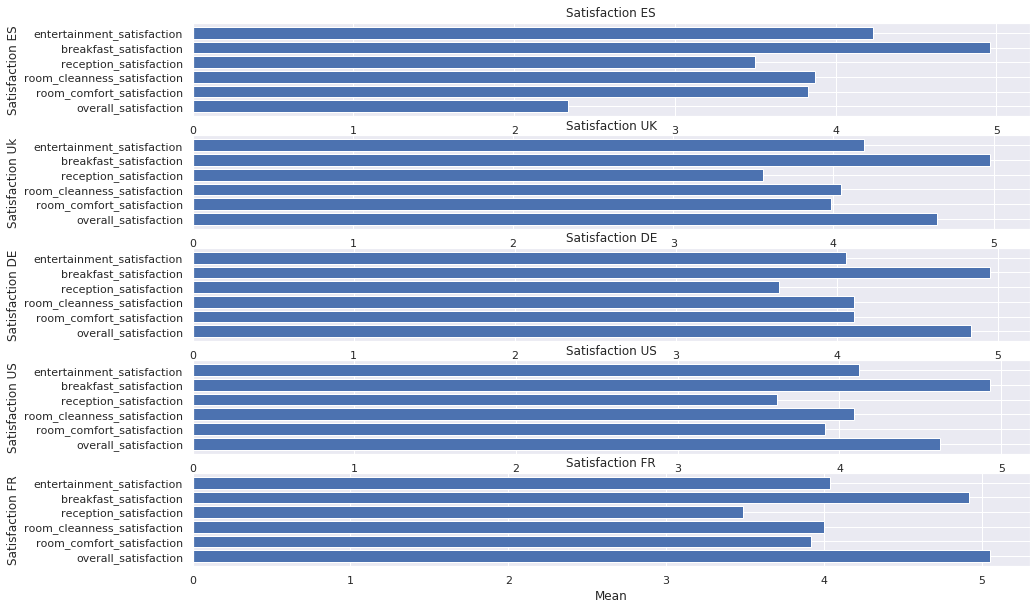

In [171]:
plt.figure(figsize=(15,10))

plt.subplot(5, 1, 1)
plt.title('Satisfaction ES')
plt.xlabel('Mean')
plt.ylabel('Satisfaction ES')
plt.barh(satisfaction_es_mean['satisfaction_es'],satisfaction_spain_mean['mean'])


plt.subplot(5, 1, 2)
plt.title('Satisfaction UK')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Uk')
plt.barh(satisfaction_uk_mean['satisfaction_uk'], satisfaction_uk_mean['mean'])


plt.subplot(5, 1, 3)
plt.title('Satisfaction DE')
plt.xlabel('Mean')
plt.ylabel('Satisfaction DE')
plt.barh(satisfaction_de_mean['satisfaction_de'], satisfaction_de_mean['mean'])

plt.subplot(5, 1, 4)
plt.title('Satisfaction US')
plt.xlabel('Mean')
plt.ylabel('Satisfaction US')
plt.barh(satisfaction_us_mean['satisfaction_us'], satisfaction_us_mean['mean'])

plt.subplot(5, 1, 5)
plt.title('Satisfaction FR')
plt.xlabel('Mean')
plt.ylabel('Satisfaction FR')
plt.barh(satisfaction_fr_mean['satisfaction_fr'], satisfaction_fr_mean['mean'])


plt.show()

### Number of surveys per segment

In [184]:
number_segment = data[['segment', 'id']].groupby('segment').id.count().reset_index().sort_values('id', ascending=False)
number_segment['percentage'] = (number_segment['id']/ number_segment['id'].sum()) *100
number_segment.head()

,segment,id,percentage
2,family,300,43.103448
1,couple,147,21.120690
3,friends,128,18.390805
0,business,121,17.385057


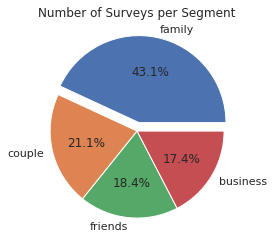

In [187]:
explode = (0.1, 0, 0, 0) 
plt.pie(number_segment['percentage'], explode=explode, labels=number_segment['segment'], autopct='%1.1f%%')
plt.title('Number of Surveys per Segment')

plt.show()

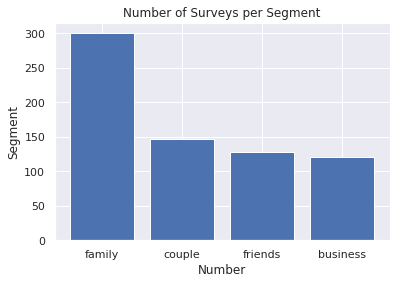

In [189]:
plt.title('Number of Surveys per Segment')
plt.xlabel('Number')
plt.ylabel('Segment')
plt.bar(number_segment['segment'], number_segment['id'])
plt.show()

### Overall Satisfaction per Segment

In [191]:
overall_satisfaction_segment = data[['segment', 'overall_satisfaction']].groupby('segment').overall_satisfaction.mean().reset_index().sort_values('overall_satisfaction', ascending=False)
overall_satisfaction_segment.head()

,segment,overall_satisfaction
2,family,3.734290
1,couple,3.556823
0,business,3.451736
3,friends,3.353922


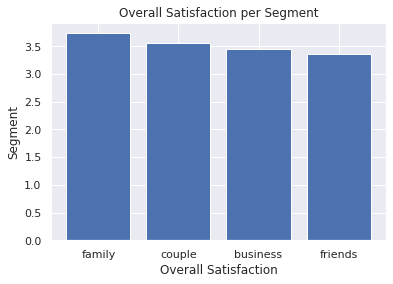

In [192]:
plt.title('Overall Satisfaction per Segment')
plt.xlabel('Overall Satisfaction')
plt.ylabel('Segment')
plt.bar(overall_satisfaction_segment['segment'], overall_satisfaction_segment['overall_satisfaction'])
plt.show()

### Family satisfaction

In [193]:
satisfaction_family = df[df['segment']=='family']
satisfaction_family_mean = satisfaction_family.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_family', 0:'mean'})
satisfaction_family_mean

,satisfaction_family,mean
0,overall_satisfaction,3.734290
1,room_comfort_satisfaction,3.953333
2,room_cleanness_satisfaction,4.006667
3,reception_satisfaction,3.543333
4,breakfast_satisfaction,4.960000
5,entertainment_satisfaction,4.106667


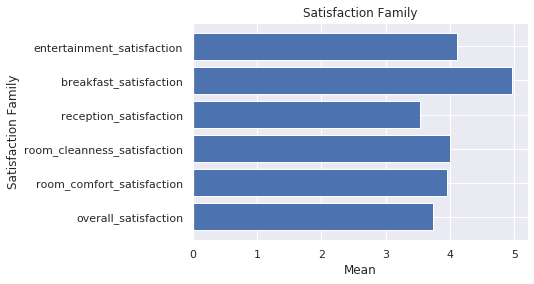

In [194]:
plt.title('Satisfaction Family')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Family')
plt.barh(satisfaction_family_mean['satisfaction_family'], satisfaction_family_mean['mean'])
plt.show()

### Couple satisfaction

In [195]:
satisfaction_couple = df[df['segment']=='couple']
satisfaction_couple_mean = satisfaction_couple.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_couple', 0:'mean'})
satisfaction_couple_mean

,satisfaction_couple,mean
0,overall_satisfaction,3.556823
1,room_comfort_satisfaction,4.047619
2,room_cleanness_satisfaction,4.129252
3,reception_satisfaction,3.578231
4,breakfast_satisfaction,4.959184
5,entertainment_satisfaction,4.285714


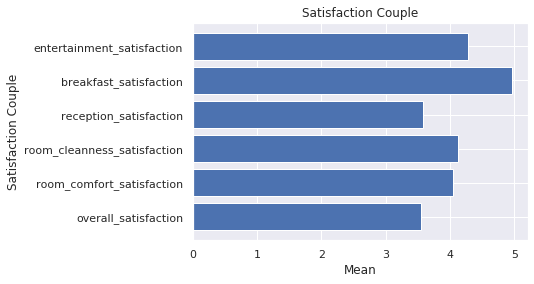

In [196]:
plt.title('Satisfaction Couple')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Couple')
plt.barh(satisfaction_couple_mean['satisfaction_couple'], satisfaction_couple_mean['mean'])
plt.show()

### Business satisfaction

In [197]:
satisfaction_business = df[df['segment']=='business']
satisfaction_business_mean = satisfaction_business.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_business', 0:'mean'})
satisfaction_business_mean

,satisfaction_business,mean
0,overall_satisfaction,3.451736
1,room_comfort_satisfaction,3.842975
2,room_cleanness_satisfaction,3.917355
3,reception_satisfaction,3.561983
4,breakfast_satisfaction,4.966942
5,entertainment_satisfaction,4.165289


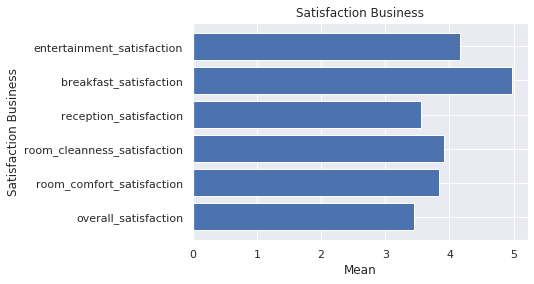

In [198]:
plt.title('Satisfaction Business')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Business')
plt.barh(satisfaction_business_mean['satisfaction_business'], satisfaction_business_mean['mean'])
plt.show()

### Friends Satisfaction

In [201]:
satisfaction_friends = df[df['segment']=='friends']
satisfaction_friends_mean = satisfaction_friends.mean().reset_index().drop(6, axis=0).rename(columns={'index':'satisfaction_friends', 0:'mean'})
satisfaction_friends_mean

,satisfaction_friends,mean
0,overall_satisfaction,3.353922
1,room_comfort_satisfaction,3.867188
2,room_cleanness_satisfaction,3.859375
3,reception_satisfaction,3.484375
4,breakfast_satisfaction,4.945312
5,entertainment_satisfaction,4.117188


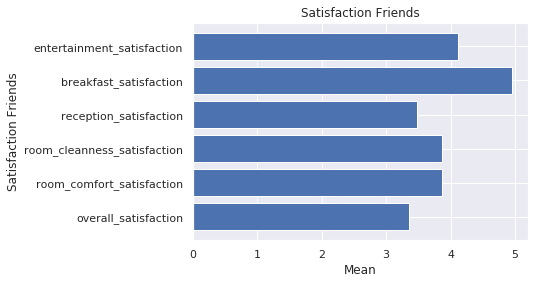

In [202]:
plt.title('Satisfaction Friends')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Friends')
plt.barh(satisfaction_friends_mean['satisfaction_friends'], satisfaction_friends_mean['mean'])
plt.show()

### Segment Summary

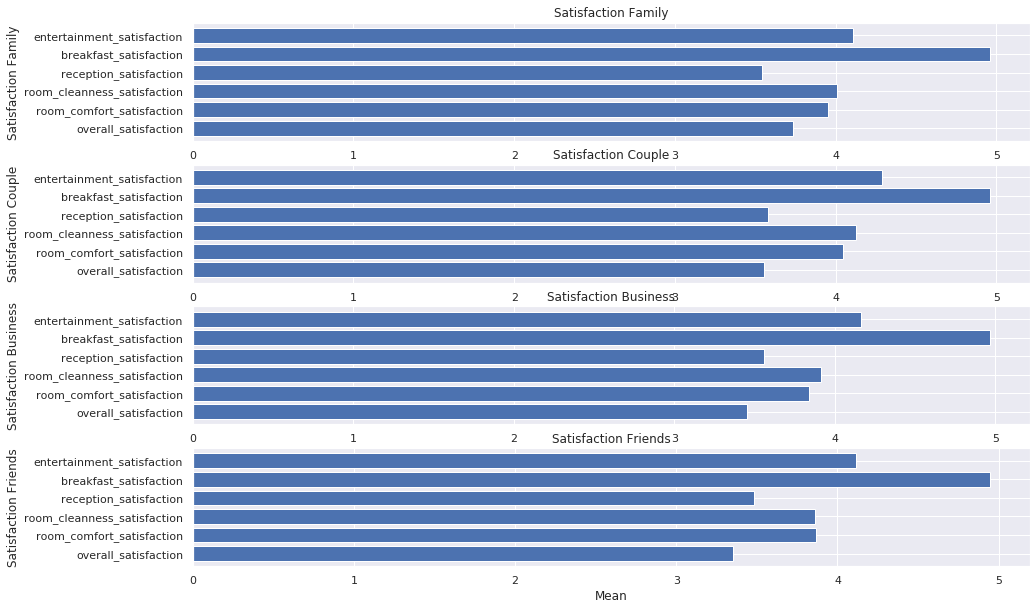

In [203]:
plt.figure(figsize=(15,10))

plt.subplot(4, 1, 1)
plt.title('Satisfaction Family')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Family')
plt.barh(satisfaction_family_mean['satisfaction_family'], satisfaction_family_mean['mean'])

plt.subplot(4, 1, 2)
plt.title('Satisfaction Couple')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Couple')
plt.barh(satisfaction_couple_mean['satisfaction_couple'], satisfaction_couple_mean['mean'])

plt.subplot(4, 1, 3)
plt.title('Satisfaction Business')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Business')
plt.barh(satisfaction_business_mean['satisfaction_business'], satisfaction_business_mean['mean'])

plt.subplot(4, 1, 4)
plt.title('Satisfaction Friends')
plt.xlabel('Mean')
plt.ylabel('Satisfaction Friends')
plt.barh(satisfaction_friends_mean['satisfaction_friends'], satisfaction_friends_mean['mean'])


plt.show()


I should follow with the same process deeping in segment by nationality. Especially Spain due to is the nationality with the worst overall satisfaction

### Creating clean data for the model:

In [11]:
data.to_csv('../data/clean_survey.csv', sep=',', encoding='utf-8')

## Model

Loading the data into the data frame:

In [7]:
data = pd.read_csv('../data/clean_survey.csv', sep=',').drop('Unnamed: 0', axis=1)
data.head()

,overall_satisfaction,room_comfort_satisfaction,room_cleanness_satisfaction,nationality,reception_satisfaction,breakfast_satisfaction,regime,segment,entertainment_satisfaction,id
0,2.989,3.0,3.0,ES,3.0,4.0,all inclusive,friends,4.0,1
1,5.964,4.0,4.0,UK,4.0,5.0,all inclusive,family,5.0,3
2,2.122,5.0,5.0,ES,3.0,5.0,all inclusive,friends,3.0,4
3,5.410,5.0,5.0,UK,4.0,5.0,all inclusive,business,5.0,5
4,5.410,5.0,5.0,DE,4.0,5.0,all inclusive,family,5.0,6


Dummify variables (nationality and segment):

In [8]:
dummy = pd.get_dummies(data[['nationality', 'segment']])
dummy.head()

,nationality_DE,nationality_ES,nationality_FR,nationality_UK,nationality_US,segment_business,segment_couple,segment_family,segment_friends
0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0


Merge data with dummy:

In [9]:
data = data.merge(dummy, left_index=True, right_index=True)
data.head()

,overall_satisfaction,room_comfort_satisfaction,room_cleanness_satisfaction,nationality,reception_satisfaction,breakfast_satisfaction,regime,segment,entertainment_satisfaction,id,nationality_DE,nationality_ES,nationality_FR,nationality_UK,nationality_US,segment_business,segment_couple,segment_family,segment_friends
0,2.989,3.0,3.0,ES,3.0,4.0,all inclusive,friends,4.0,1,0,1,0,0,0,0,0,0,1
1,5.964,4.0,4.0,UK,4.0,5.0,all inclusive,family,5.0,3,0,0,0,1,0,0,0,1,0
2,2.122,5.0,5.0,ES,3.0,5.0,all inclusive,friends,3.0,4,0,1,0,0,0,0,0,0,1
3,5.410,5.0,5.0,UK,4.0,5.0,all inclusive,business,5.0,5,0,0,0,1,0,1,0,0,0
4,5.410,5.0,5.0,DE,4.0,5.0,all inclusive,family,5.0,6,1,0,0,0,0,0,0,1,0


In [10]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,overall_satisfaction,room_comfort_satisfaction,room_cleanness_satisfaction,reception_satisfaction,breakfast_satisfaction,entertainment_satisfaction,id,nationality_DE,nationality_ES,nationality_FR,nationality_UK,nationality_US,segment_business,segment_couple,segment_family,segment_friends
overall_satisfaction,1.00,0.57,0.55,0.48,0.04,0.02,0.03,0.28,-0.79,0.24,0.47,0.18,-0.04,-0.01,0.09,-0.07
room_comfort_satisfaction,0.57,1.00,0.93,0.79,0.03,0.05,0.03,0.08,-0.08,0.04,0.04,-0.03,-0.04,0.05,0.01,-0.03
room_cleanness_satisfaction,0.55,0.93,1.00,0.74,0.02,0.06,0.02,0.06,-0.10,0.03,0.04,0.01,-0.03,0.06,0.01,-0.05
reception_satisfaction,0.48,0.79,0.74,1.00,0.02,0.04,0.05,0.07,-0.06,0.01,0.00,0.02,0.01,0.02,0.00,-0.04
breakfast_satisfaction,0.04,0.03,0.02,0.02,1.00,0.03,0.06,0.00,-0.03,-0.05,0.07,-0.03,0.02,0.00,0.01,-0.03
entertainment_satisfaction,0.02,0.05,0.06,0.04,0.03,1.00,0.03,-0.01,0.01,-0.04,0.02,-0.02,0.00,0.06,-0.04,-0.02
id,0.03,0.03,0.02,0.05,0.06,0.03,1.00,0.00,-0.02,-0.01,-0.04,0.11,0.00,0.06,-0.06,0.02
nationality_DE,0.28,0.08,0.06,0.07,0.00,-0.01,0.00,1.00,-0.33,-0.08,-0.22,-0.09,0.02,-0.00,-0.01,-0.00
nationality_ES,-0.79,-0.08,-0.10,-0.06,-0.03,0.01,-0.02,-0.33,1.00,-0.22,-0.64,-0.25,-0.01,0.04,-0.06,0.04
nationality_FR,0.24,0.04,0.03,0.01,-0.05,-0.04,-0.01,-0.08,-0.22,1.00,-0.15,-0.06,-0.01,0.00,0.05,-0.05


In [158]:
data_model = data.drop(['nationality', 'regime', 'segment', 'id',], axis=1)
data_model.head()

,overall_satisfaction,room_comfort_satisfaction,room_cleanness_satisfaction,reception_satisfaction,breakfast_satisfaction,entertainment_satisfaction,nationality_DE,nationality_ES,nationality_FR,nationality_UK,nationality_US,segment_business,segment_couple,segment_family,segment_friends
0,2.989,3.0,3.0,3.0,4.0,4.0,0,1,0,0,0,0,0,0,1
1,5.964,4.0,4.0,4.0,5.0,5.0,0,0,0,1,0,0,0,1,0
2,2.122,5.0,5.0,3.0,5.0,3.0,0,1,0,0,0,0,0,0,1
3,5.410,5.0,5.0,4.0,5.0,5.0,0,0,0,1,0,1,0,0,0
4,5.410,5.0,5.0,4.0,5.0,5.0,1,0,0,0,0,0,0,1,0


Analizing correlation between variables:

In [141]:
corr = data_model.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,overall_satisfaction,room_comfort_satisfaction,room_cleanness_satisfaction,reception_satisfaction,breakfast_satisfaction,entertainment_satisfaction,nationality_DE,nationality_ES,nationality_FR,nationality_UK,nationality_US,segment_business,segment_couple,segment_family,segment_friends
overall_satisfaction,1.00,0.57,0.55,0.48,0.04,0.02,0.28,-0.79,0.24,0.47,0.18,-0.04,-0.01,0.09,-0.07
room_comfort_satisfaction,0.57,1.00,0.93,0.79,0.03,0.05,0.08,-0.08,0.04,0.04,-0.03,-0.04,0.05,0.01,-0.03
room_cleanness_satisfaction,0.55,0.93,1.00,0.74,0.02,0.06,0.06,-0.10,0.03,0.04,0.01,-0.03,0.06,0.01,-0.05
reception_satisfaction,0.48,0.79,0.74,1.00,0.02,0.04,0.07,-0.06,0.01,0.00,0.02,0.01,0.02,0.00,-0.04
breakfast_satisfaction,0.04,0.03,0.02,0.02,1.00,0.03,0.00,-0.03,-0.05,0.07,-0.03,0.02,0.00,0.01,-0.03
entertainment_satisfaction,0.02,0.05,0.06,0.04,0.03,1.00,-0.01,0.01,-0.04,0.02,-0.02,0.00,0.06,-0.04,-0.02
nationality_DE,0.28,0.08,0.06,0.07,0.00,-0.01,1.00,-0.33,-0.08,-0.22,-0.09,0.02,-0.00,-0.01,-0.00
nationality_ES,-0.79,-0.08,-0.10,-0.06,-0.03,0.01,-0.33,1.00,-0.22,-0.64,-0.25,-0.01,0.04,-0.06,0.04
nationality_FR,0.24,0.04,0.03,0.01,-0.05,-0.04,-0.08,-0.22,1.00,-0.15,-0.06,-0.01,0.00,0.05,-0.05
nationality_UK,0.47,0.04,0.04,0.00,0.07,0.02,-0.22,-0.64,-0.15,1.00,-0.17,-0.00,-0.02,0.03,-0.02


Building a model:

In [131]:
import statsmodels.formula.api as smf
from scipy import stats

In [154]:
model = smf.ols('overall_satisfaction~room_comfort_satisfaction+room_cleanness_satisfaction+reception_satisfaction+breakfast_satisfaction+entertainment_satisfaction+entertainment_satisfaction+nationality_DE+nationality_ES+nationality_FR+nationality_UK+nationality_US+segment_business+segment_couple+segment_family+segment_friends', data=data_model)

Fit model:

In [155]:
result = model.fit()

Evaluate model:

In [156]:
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     overall_satisfaction   R-squared:                       0.886
Model:                              OLS   Adj. R-squared:                  0.884
Method:                   Least Squares   F-statistic:                     442.6
Date:                  Sat, 22 Feb 2020   Prob (F-statistic):          1.64e-312
Time:                          19:29:11   Log-Likelihood:                -531.88
No. Observations:                   696   AIC:                             1090.
Df Residuals:                       683   BIC:                             1149.
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Model before have multicollinearity because there are a lot of variables that have a big correlation between them. For this reason we must chose the best ones (p values are lower 0,05)

In [177]:
model2 = smf.ols('overall_satisfaction~room_comfort_satisfaction+reception_satisfaction+nationality_DE+nationality_ES+nationality_FR+nationality_UK+nationality_US+segment_family', data=data_model)

In [178]:
result2 = model2.fit()

In [179]:
print(result2.summary())

                             OLS Regression Results                             
Dep. Variable:     overall_satisfaction   R-squared:                       0.886
Model:                              OLS   Adj. R-squared:                  0.884
Method:                   Least Squares   F-statistic:                     760.3
Date:                  Sat, 22 Feb 2020   Prob (F-statistic):          7.61e-319
Time:                          19:53:41   Log-Likelihood:                -533.46
No. Observations:                   696   AIC:                             1083.
Df Residuals:                       688   BIC:                             1119.
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

We need eliminate more variables:

In [185]:
model3 = smf.ols('overall_satisfaction~room_comfort_satisfaction+reception_satisfaction+nationality_ES+nationality_UK+segment_family', data=data_model)

In [186]:
result3 = model3.fit()

In [187]:
print(result3.summary())

                             OLS Regression Results                             
Dep. Variable:     overall_satisfaction   R-squared:                       0.883
Model:                              OLS   Adj. R-squared:                  0.882
Method:                   Least Squares   F-statistic:                     1040.
Date:                  Sat, 22 Feb 2020   Prob (F-statistic):          2.11e-318
Time:                          19:56:03   Log-Likelihood:                -541.52
No. Observations:                   696   AIC:                             1095.
Df Residuals:                       690   BIC:                             1122.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

### Simmulator

In [196]:
intercept_ = 1.7478 
room_comfort_satisfaction_ = 0.5844
reception_satisfaction_ = 0.1885
nationality_ES_ = -2.3650
nationality_UK_ = 0.1359
segment_family_ = 0.1236

In [197]:
room_comfort_satisfaction = 5
reception_satisfaction = 4
nationality_ES = 1
nationality_UK = 0
segment_family = 1

In [199]:
yi = intercept_ + (room_comfort_satisfaction*room_comfort_satisfaction_) + (reception_satisfaction+reception_satisfaction_) +(nationality_ES*nationality_ES_)+(nationality_UK*nationality_UK_)+(segment_family*segment_family_)

In [200]:
print(yi)

6.616899999999999
